# data analysis
# data analysis
# data analysis
# data analysis
# data analysis

youtube_project_0915_10am.db

regional features are only extracted for channel - "UCFSb_tOQQJtBJsOiakWqhgQ", index - 331 (done) and before

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import sqlite3

import warnings
warnings.filterwarnings('ignore')

In [99]:
# read sqlite3 data into pandas
conn = sqlite3.connect('youtube_project_0915_10am.db') # connection
df = pd.read_sql_query("SELECT * from videos_makeup", conn)
conn.close

<function Connection.close>

In [3]:
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 500

In [4]:
df.dtypes

channel_id              object
subscriptions_count      int64
videos_count             int64
video_id                object
video_views              int64
video_title             object
video_date              object
hue                    float64
saturation             float64
brightness_global      float64
dynamic_range          float64
contrast_Mic           float64
contrast_RMS           float64
len_title                int64
ratio_bc_fr            float64
bri_fr_mean            float64
bri_bc_mean            float64
bri_diff_mean          float64
contrast_bc            float64
contrast_fr            float64
contrast_diff          float64
sat_bc                 float64
dtype: object

In [5]:
df.head(n=5)

,channel_id,subscriptions_count,videos_count,video_id,video_views,video_title,video_date,hue,saturation,brightness_global,dynamic_range,contrast_Mic,contrast_RMS,len_title,ratio_bc_fr,bri_fr_mean,bri_bc_mean,bri_diff_mean,contrast_bc,contrast_fr,contrast_diff,sat_bc
0,UCaezsZGhwWgB4ZRmHNCfIyw,671404,98,39aKSTw1HfY,37755,Glitter Eye Makeup Look - Isabella Fiori,11 hours ago,0.376588,0.144493,0.591732,0.996078,0.992188,0.260912,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,UCaezsZGhwWgB4ZRmHNCfIyw,671404,98,7MzCD3hScOY,166407,DRUGSTORE BACK TO SCHOOL MAKEUP TUTORIAL,3 days ago,0.517865,0.138269,0.819456,0.968627,0.946360,0.210627,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,UCaezsZGhwWgB4ZRmHNCfIyw,671404,98,Lnbd9RQceNQ,152645,Grunge Cranberry Smokey Eye,5 days ago,0.397870,0.194863,0.600100,0.984314,0.969112,0.186909,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,UCaezsZGhwWgB4ZRmHNCfIyw,671404,98,_aaa-zeH6zo,201716,HOW I DID MY MAKEUP IN HIGH SCHOOL!,1 week ago,0.411592,0.144167,0.617192,0.968627,1.000000,0.217338,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,UCaezsZGhwWgB4ZRmHNCfIyw,671404,98,_f6ahQn7Zgw,90022,100 LAYERS OF SHIRTS,1 week ago,0.348731,0.062799,0.733219,1.000000,1.000000,0.159050,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Plot distribution of 
### For videos distribution:
1. views vs. video (√)
2. views/subscription vs. video (√)

### For channel distribution:
1. channel subscriptions vs. channel (√)
2. total videos vs. channel (√)
3. mean of (views/videos) vs. channel
4. mean of (views/videos/subscriptions) vs. channel


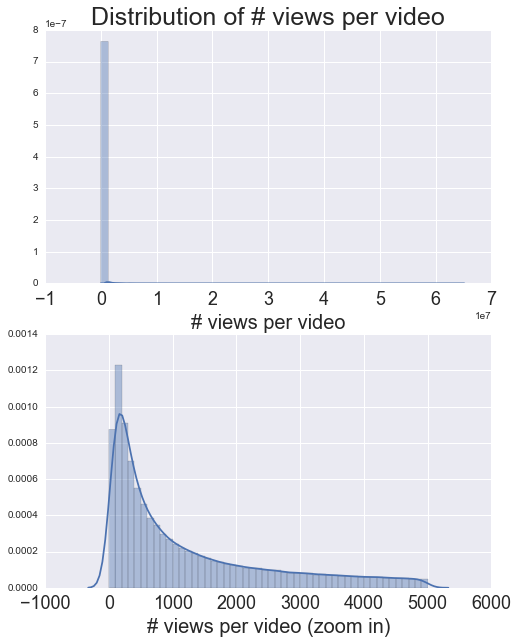

In [9]:
####################################
# plot number of views for each video

y_views_of_video = df['video_views'].tolist()
y_views_of_video_zoom = [x for x in y_views_of_video if x < 5000]

fig = plt.figure(figsize=(8,10))

plt.subplot(2, 1, 1)
sns.distplot(y_views_of_video)
plt.xlabel('# views per video', fontsize=20)
plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)
plt.title('Distribution of # views per video', fontsize=25)
#plt.savefig('distribution_views_per_video.pdf')

plt.subplot(2, 1, 2)
sns.distplot(y_views_of_video_zoom)
plt.xlabel('# views per video (zoom in)', fontsize=20)
plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)

#plt.subplots_adjust(bottom=0.2, right=1.5, top=0.99, hspace=0.5)
fig.savefig('distribution_views_per_video.pdf')

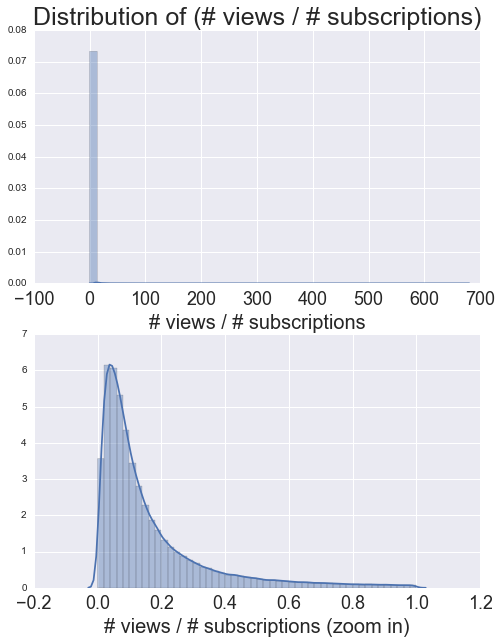

In [10]:
####################################
# plot views/subscriptions for each video

y_subscriptions = df['subscriptions_count'].tolist()
y_videws_div_subs = [x / y for x,y in zip(y_views_of_video, y_subscriptions)]

y_videws_div_subs_zoom = [x for x in y_videws_div_subs if x < 1]

fig = plt.figure(figsize=(8,10))

plt.subplot(2, 1, 1)
sns.distplot(y_videws_div_subs)
plt.xlabel('# views / # subscriptions', fontsize=20)
plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)
plt.title('Distribution of (# views / # subscriptions)', fontsize=25)

plt.subplot(2, 1, 2)
sns.distplot(y_videws_div_subs_zoom)
plt.xlabel('# views / # subscriptions (zoom in)', fontsize=20)
plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)

#plt.subplots_adjust(bottom=0.2, right=1.5, top=0.99, hspace=0.5)
fig.savefig('distribution_views_div_subs_per_video.pdf')

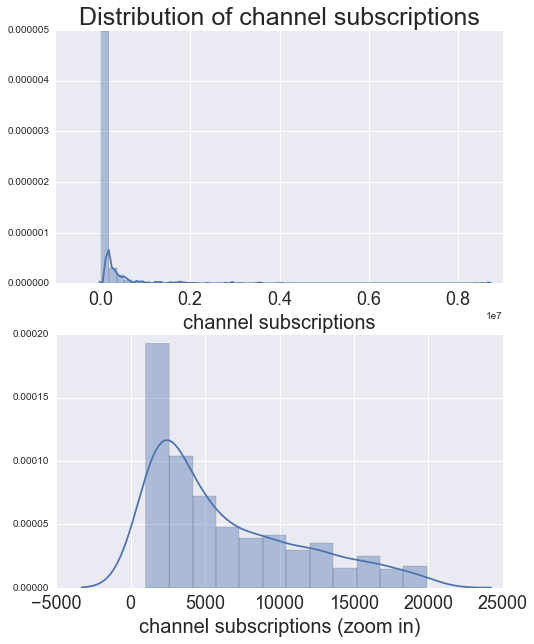

In [11]:
####################################
# plot channel subscriptions 
y_subscriptions_set = list(set(y_subscriptions)) # remove all duplicates

y_subscriptions_set_zoom = [x for x in y_subscriptions_set if x < 20000]

fig = plt.figure(figsize=(8,10))

plt.subplot(2, 1, 1)
sns.distplot(y_subscriptions_set)
plt.xlabel('channel subscriptions', fontsize=20)
plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)
plt.title('Distribution of channel subscriptions', fontsize=25)

plt.subplot(2, 1, 2)
sns.distplot(y_subscriptions_set_zoom)
plt.xlabel('channel subscriptions (zoom in)', fontsize=20)
plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)

#plt.subplots_adjust(bottom=0.2, right=1.5, top=0.99, hspace=0.5)
fig.savefig('distribution_channel_subscriptions.pdf')

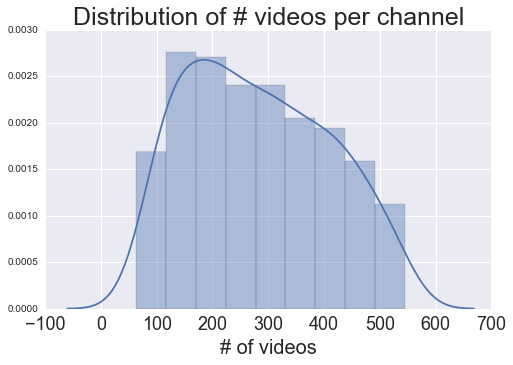

In [12]:
####################################
# plot (number of videos) per channel
y_videos_count = df['videos_count'].tolist()
y_videos_count_set = list(set(y_videos_count)) # remove all duplicates

fig = plt.figure(figsize=(8,5))

sns.distplot(y_videos_count_set)
plt.xlabel('# of videos', fontsize=20)
plt.xticks(fontsize=18)
plt.title('Distribution of # videos per channel', fontsize=25)
fig.savefig('distribution_videos_count.pdf')

In [14]:
# connect to sqlite3
conn = sqlite3.connect('youtube_project_0915_10am.db') # connection
c = conn.cursor() # cursor
c_1 = conn.cursor()
c_2 = conn.cursor()
c_3 = conn.cursor()
c_4 = conn.cursor()

In [73]:
conn.close

<function Connection.close>

In [15]:
# get the list of all channels, ordered by their id
channel_scraped = []  # save all the channel id got selected 
for row in c.execute('SELECT DISTINCT channel_id FROM videos_makeup ORDER BY channel_id'):
    channel_scraped.append(row[0])
len(channel_scraped)

1281

In [16]:
# compute summary informtion of each channel:
# channel subscriptions, total videos, total views, average views, average views/subs
channel_summary = [] 
for channel in channel_scraped:
    # find the total number of videos
    print("Channel index is {0}".format(channel_scraped.index(channel)))
    for row in c_1.execute("SELECT COUNT(*) FROM videos_makeup WHERE channel_id = '{0}'".format(channel)):
        videos_count = row[0]
        print ("Channel - {0} has {1} videos".format(channel, videos_count))
    # find the total views of a channel, and its subscriptions
    views_total = 0
    for row in c_2.execute("SELECT * FROM videos_makeup WHERE channel_id = '{0}'".format(channel)):
        views_total = views_total + row[4]
        channel_subs = row[1]
    #print("This channel has in total {0} views".format(views_total))
    # compute mean of views
    average_views = views_total / videos_count
    #print("Each video of this channel has on average {0} views.".format(average_views))
    # compute mean of views / subscriptions
    average_views_div_subs = average_views / channel_subs
    #print("Each video of this channel has on average {0} views/subscriptions.".format(average_views_div_subs))
    channel_summary.append([channel_subs, videos_count, views_total, average_views, average_views_div_subs])
    

Channel index is 0
Channel - UC-0_aCN0_CSiJ6s7ryG2EtA has 216 videos
Channel index is 1
Channel - UC-1D8zLe0x0cbN7we5a60tw has 113 videos
Channel index is 2
Channel - UC-2PHolhimwX9q7rH0ZvVBQ has 272 videos
Channel index is 3
Channel - UC-5LNANFKTC1DOkuhbeq6OQ has 314 videos
Channel index is 4
Channel - UC-6vn5Qr-Ii73A8n3KOHsLg has 390 videos
Channel index is 5
Channel - UC-BHWT2qAsBR9fFoN96vLHw has 108 videos
Channel index is 6
Channel - UC-Hyk0VXmjfwxVgh5usrTDw has 104 videos
Channel index is 7
Channel - UC-LrxyeSD_L9Ul1e0SsbmYg has 143 videos
Channel index is 8
Channel - UC-Q7O71xFCDcn-w1M6kRubQ has 286 videos
Channel index is 9
Channel - UC-QSKUvM_sBxph2LIV9aLBg has 227 videos
Channel index is 10
Channel - UC-RX7Rb0D8xmWGWIwL8kvmQ has 403 videos
Channel index is 11
Channel - UC-THoU3XcvNhhnSOAxrGx7Q has 306 videos
Channel index is 12
Channel - UC-TfplNkeMMPhs9aqntfYvA has 211 videos
Channel index is 13
Channel - UC-V2ze2c4s7rV4neMd7ZS-w has 389 videos
Channel index is 14
Channel - 

In [17]:
print(channel_summary[0])

[2587, 216, 253516, 1173.6851851851852, 0.45368580795716473]


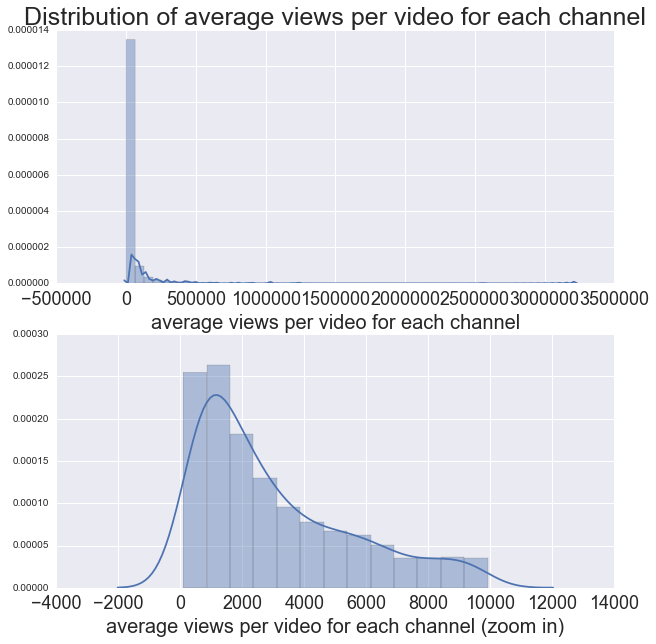

In [18]:
###############################################
# the average views per video for each channel 
channel_average_views_per_video = [x[3] for x in channel_summary]
channel_average_views_per_video_zoom = [x for x in channel_average_views_per_video if x < 10000]

fig = plt.figure(figsize=(10,10))

plt.subplot(2, 1, 1)
sns.distplot(channel_average_views_per_video)
plt.xlabel('average views per video for each channel', fontsize=20)
plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)
plt.title('Distribution of average views per video for each channel', fontsize=25)

plt.subplot(2, 1, 2)
sns.distplot(channel_average_views_per_video_zoom)
plt.xlabel('average views per video for each channel (zoom in)', fontsize=20)
plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)

#plt.subplots_adjust(bottom=0.2, right=1.5, top=0.99, hspace=0.5)
fig.savefig('distribution_average_views_per_video.pdf')

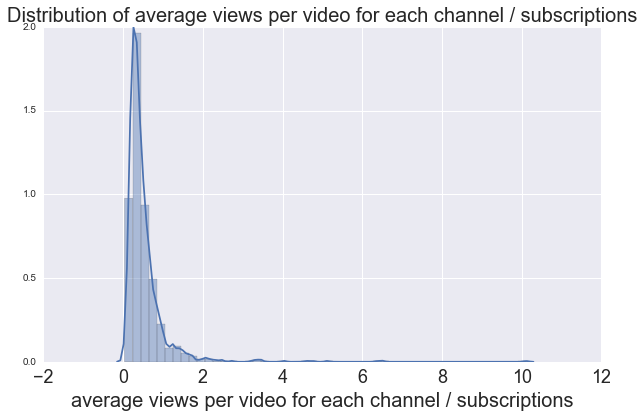

In [19]:
###############################################
# the average views per video for each channel / subscription
channel_average_views_per_video_div_subs = [x[4] for x in channel_summary]
#channel_average_views_per_video_div_subs_zoom = [x for x in channel_average_views_per_video_div_subs if x < 10000]

fig = plt.figure(figsize=(10,6))

sns.distplot(channel_average_views_per_video_div_subs)
plt.xlabel('average views per video for each channel / subscriptions', fontsize=20)
plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)
plt.title('Distribution of average views per video for each channel / subscriptions', fontsize=20)

#plt.subplots_adjust(bottom=0.2, right=1.5, top=0.99, hspace=0.5)
fig.savefig('distribution_average_views_per_video_div_subs.pdf')

## Plot some relations
### 1. average views per video vs. subscriptions

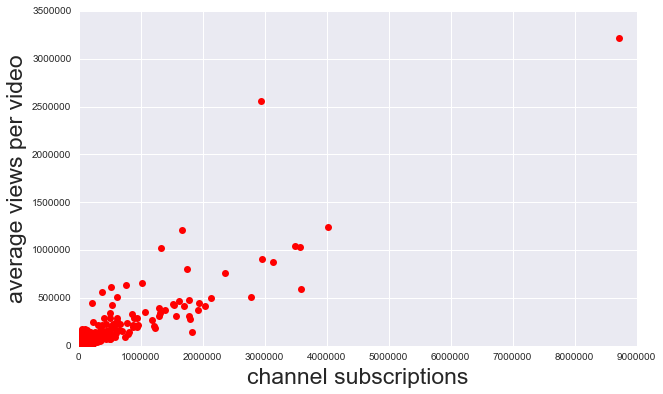

In [21]:
################################################
# plot average views per video vs. subscriptions
channel_subscriptions = [x[0] for x in channel_summary]
fig = plt.figure(figsize=(10,6))
plt.plot(channel_subscriptions, channel_average_views_per_video, 'ro')
plt.xlabel('channel subscriptions', fontsize=23)
plt.ylabel('average views per video', fontsize=23)
#plt.xticks(fontsize=18)
fig.savefig('relation_average_views_vs_subs.pdf')

# Machine Learning algorithms (global features only) 
# Machine Learning algorithms (global features only)
# Machine Learning algorithms (global features only)
# Machine Learning algorithms (global features only)
# Machine Learning algorithms (global features only)

In [22]:
######################################################################################
####### define functions to compute performance of different models/algorithms #######
######################################################################################

# compute F1 score
def get_score (correct_class, predicted_class):
    correct = correct_class.tolist()
    pred = predicted_class.tolist()
    TP = 0
    FP = 0
    FN = 0
    for i in range(0, len(correct)):
        TP += int((correct[i] == 2) & (pred[i] == 2))
        FP += int((correct[i] == 1) & (pred[i] == 2))
        FN += int((correct[i] == 2) & (pred[i] == 1))
    precision = TP / (TP + FP) 
    recall = TP / (TP + FN)
    score = 2 * precision * recall / (precision + recall)
    return (score)

# compute test/traing error
def get_error (correct_class, predicted_class):
    diff = correct_class - predicted_class
    diff = diff.tolist()
    err = 1 - diff.count(0)/len(diff)
    return (err)

# compute mean absolute error for regression
def get_mean_abs_error (correct_class, predicted_class):
    y_corr = correct_class.tolist()
    y_pre = predicted_class.tolist()
    y_mean = sum(y_corr)/len(y_corr)
    error_all = []
    for i in range(0, len(y_corr)):
        err = abs(y_pre[i] - y_corr[i]) / y_corr[i]
        error_all.append(err)
    return (sum(error_all) / len(error_all))

In [135]:
df.iloc[:2, 7:14]

,hue,saturation,brightness_global,dynamic_range,contrast_Mic,contrast_RMS,len_title
0,0.376588,0.144493,0.591732,0.996078,0.992188,0.260912,40
1,0.517865,0.138269,0.819456,0.968627,0.946360,0.210627,40


In [142]:
###############################################################
###### construct training set and test set ######
###### decide input and target (popular or not) features ######
###############################################################
size_data = int(1 * df.shape[0]) # only use 20% data base for now

# 70% data as training set, 30% as test set

size_training = int(0.7 * size_data)
df_training = df.iloc[:size_training, :]
df_test = df.iloc[size_training:size_data, :]


# find median of views/subscriptions --> classification as 0 (unpopular) or 1 (popular)
pop_threshold = (df.iloc[:size_data,4] / df.iloc[:size_data,1]).median() # video views/subscriptions


# select input features: day vs. night, season, longevity, sillage, notes, accords
# select target feature: whether a perfume is popular or not
x_train = df_training.iloc[:, 7:14].values
x_test = df_test.iloc[:, 7:14].values

y_train = ((df_training.iloc[:, 4] / df_training.iloc[:, 1]) > pop_threshold) * 1
y_test = ((df_test.iloc[:, 4] / df_test.iloc[:, 4]) > pop_threshold) * 1


In [175]:
df.iloc[size_training + 700:size_training + 706,]

,channel_id,subscriptions_count,videos_count,video_id,video_views,video_title,video_date,hue,saturation,brightness_global,dynamic_range,contrast_Mic,contrast_RMS,len_title,ratio_bc_fr,bri_fr_mean,bri_bc_mean,bri_diff_mean,contrast_bc,contrast_fr,contrast_diff,sat_bc
198496,UCQfSm7nY8yx5n8HkH59E00A,133721,320,EBIJCeN5-Q0,347,August favorites!,4 years ago,0.185794,0.434843,0.469840,0.996078,0.992188,0.382192,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198497,UCQfSm7nY8yx5n8HkH59E00A,133721,320,930_rbLMoT0,9553,Makeup Collection!,4 years ago,0.300093,0.325966,0.520903,0.980392,0.961538,0.335424,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198498,UCQfSm7nY8yx5n8HkH59E00A,133721,320,Cl729E2sEiY,32513,Brother Sister Tag,4 years ago,0.292249,0.206241,0.509231,1.000000,1.000000,0.392449,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198499,UCQfSm7nY8yx5n8HkH59E00A,133721,320,20rPkUQFkM8,997,Haul With Caity:),4 years ago,0.109514,0.496608,0.460456,1.000000,1.000000,0.387084,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198500,UCQfSm7nY8yx5n8HkH59E00A,133721,320,noCS4R6tlog,1702,OOTD- Summer Days :),4 years ago,0.233200,0.257553,0.361597,1.000000,1.000000,0.372210,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198501,UCQfSm7nY8yx5n8HkH59E00A,133721,320,tAaBNzE2TfU,1151,What's In My Travel Carry On?! :),4 years ago,0.244186,0.290654,0.523728,1.000000,1.000000,0.388460,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Unpoupular:

1. 930_rbLMoT0, Makeup Collection!

2. 20rPkUQFkM8, Haul With Caity:)

# Popular

1. 7MzCD3hScOY, DRUGSTORE BACK TO SCHOOL MAKEUP TUTORIAL

2. 

In [141]:
type(y_train)

pandas.core.series.Series

## Decision tree classifier
## Decision tree classifier
## Decision tree classifier

In [143]:
#############################
###### DTs classifier #######
#############################

from sklearn import tree

####################################################################
# compute training/test error vs. max_depth 

depth_list = range(1, 20)
err_train_list = []
err_test_list = []
for depth in depth_list:
    print ("********************************")
    print (depth_list.index(depth))
    print ("max_depth is {}".format(depth))
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf.fit(x_train, y_train)
    print ("Done model learning")

    y_prediction = clf.predict(x_test)
    err_test = get_error(y_test, y_prediction)
    err_test_list.append(err_test)
    print ("The test error is {0}".format(err_test))
    
    y_prediction = clf.predict(x_train)
    err_train = get_error(y_train, y_prediction)
    err_train_list.append(err_train)
    print ("The train error is {0}".format(err_train))
print ("Done computing parameter dependence")
err_dts = min(err_test_list) * 100

********************************
0
max_depth is 1
Done model learning
The test error is 0.5583159335149992
The train error is 0.4560961799025258
********************************
1
max_depth is 2
Done model learning
The test error is 0.17438746741220468
The train error is 0.45459463285405166
********************************
2
max_depth is 3
Done model learning
The test error is 0.28869542650198776
The train error is 0.45026188598353856
********************************
3
max_depth is 4
Done model learning
The test error is 0.2715551308820233
The train error is 0.4492557989039212
********************************
4
max_depth is 5
Done model learning
The test error is 0.29866345802220096
The train error is 0.4480677061214585
********************************
5
max_depth is 6
Done model learning
The test error is 0.31786813886824505
The train error is 0.4473093490262695
********************************
6
max_depth is 7
Done model learning
The test error is 0.31454152953250525
The train error 

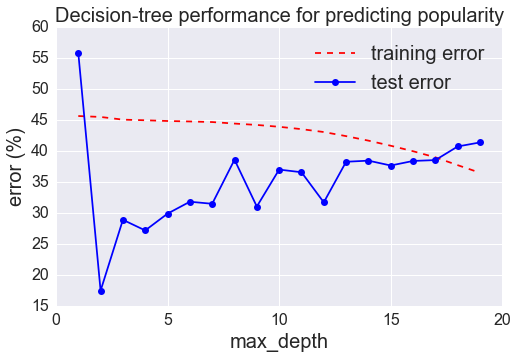

In [147]:
# plot error vs. max_depth
plt.figure(figsize=(8,5))
plt.plot(depth_list, [x * 100 for x in err_train_list], 'r--', label="training error")
plt.plot(depth_list, [x * 100 for x in err_test_list], 'bo-', label="test error")
plt.xlabel("max_depth", fontsize=20)
plt.ylabel("error (%)", fontsize=20)
plt.title("Decision-tree performance for predicting popularity", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='upper right', fontsize=20)
plt.savefig('ML_global_features_DTs.jpg')

## Save the classifiers
## Save the classifiers
## Save the classifiers

In [150]:
##########################
# train the model
clf = tree.DecisionTreeClassifier(max_depth=2)
clf.fit(x_train, y_train)

##########################
# save the model
from sklearn.externals import joblib
joblib.dump(clf, 'model_DTs_global_depth_2.pkl') 

##########################
# load the model
clf2 = joblib.load('model_DTs_global_depth_2.pkl') 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [161]:
y_prediction = clf2.predict(x_test)

In [174]:
y_prediction[700:750]

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1])

In [164]:
x_test[500]

array([  0.25333149,   0.25773162,   0.57456291,   0.94117647,
         0.88888889,   0.24892409,  19.        ])

## SVM

In [72]:
#############################
###### SVM classifier #######
#############################
from sklearn.svm import SVC

# compute test/training error vs. gamma --> overfit or underfit

gamma_list = np.logspace(0, 1, 2).tolist()
err_train_list = []
err_test_list = []
for x in gamma_list:
    print("************************************")
    print(gamma_list.index(x))
    print("gamma is {0}".format(x))
    clf = SVC(gamma=x)
    clf.fit(x_train, y_train)
    print ("Done model learning")

    y_prediction = clf.predict(x_test)
    err_test = get_error(y_test, y_prediction)
    err_test_list.append(err_test)
    print ("The test error is {0}".format(err_test))
    
    y_prediction = clf.predict(x_train)
    err_train = get_error(y_train, y_prediction)
    err_train_list.append(err_train)
    print ("The train error is {0}".format(err_train))
print("Done computing training/test errors vs. gamma")
err_svm = min(err_test_list) * 100

************************************
0
gamma is 1.0
Done model learning
The test error is 0.40863513035271914
The train error is 0.4485704896483733
************************************
1
gamma is 10.0
Done model learning
The test error is 0.4301049899728677
The train error is 0.40375135872999823
Done computing training/test errors vs. gamma


# (Doesn't work!!!!!)
## boosting classifier
## boosting classifier
## boosting classifier
## boosting classifier

Done model learning
The test error is 0.4397782234280996
The training error is 0.2776612148942087
Done computing error.
Done computing test errors vs. iterations
Done computing training errors vs. iterations


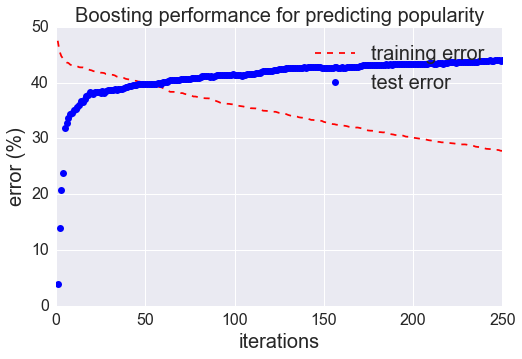

In [108]:
##################################
###### boosting classifier #######
##################################
from sklearn import ensemble

clf = ensemble.GradientBoostingClassifier(max_depth=6, n_estimators=250)
clf.fit(x_train, y_train)
print ("Done model learning")

y_prediction = clf.predict(x_test)
err_test = get_error(y_test, y_prediction)
print ("The test error is {0}".format(err_test))
err_boosting = err_test * 100

y_prediction = clf.predict(x_train)
err_train = get_error(y_train, y_prediction)
print ("The training error is {0}".format(err_train))
print ("Done computing error.")

# compute training and test error vs. iterations
itr = []
err_train_list = []
err_test_list = []
for i, y_pred in enumerate(clf.staged_predict(x_test)):
    itr.append(i + 1)
    err_test = get_error(y_test, y_pred)
    err_test_list.append(err_test)
print ("Done computing test errors vs. iterations")

for i, y_pred in enumerate(clf.staged_predict(x_train)):
    #itr.append(i + 1)
    err_train = get_error(y_train, y_pred)
    err_train_list.append(err_train)
print ("Done computing training errors vs. iterations")

# plot error vs. iterations
plt.figure(figsize=(8,5))
plt.plot(itr, [x * 100 for x in err_train_list], 'r--', label="training error")
plt.plot(itr, [x * 100 for x in err_test_list], 'bo', label="test error")
plt.xlabel("iterations", fontsize=20)
plt.ylabel("error (%)", fontsize=20)
plt.title("Boosting performance for predicting popularity", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='upper right', fontsize=20)


## Random forest classifier
## Random forest classifier
## Random forest classifier
## Random forest classifier

In [133]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=150)

clf.fit(x_train, y_train)
print ("Done model learning")

y_prediction = clf.predict(x_test)
err_test = get_error(y_test, y_prediction)
print ("The test error is {0}".format(err_test))
err_boosting = err_test * 100

y_prediction = clf.predict(x_train)
err_train = get_error(y_train, y_prediction)
print ("The training error is {0}".format(err_train))
print ("Done computing error.")

Done model learning
The test error is 0.44504606528175905
The training error is 8.594713745480043e-05
Done computing error.


# Machine learning using regional features!!!!!!
# Machine learning using regional features!!!!!!
# Machine learning using regional features!!!!!!
# Machine learning using regional features!!!!!!

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import sqlite3

import warnings
warnings.filterwarnings('ignore')

In [77]:
# connect to sqlite
import sqlite3
conn = sqlite3.connect('youtube_project_regional_550.db') # connection
c = conn.cursor() # cursor
c_1 = conn.cursor()
c_2 = conn.cursor()
c_3 = conn.cursor()
c_4 = conn.cursor()

In [78]:
##############################################
# find all channel ids, ordered alphabatically
channel_scraped = []  # save all the channel id got selected 
for row in c.execute('SELECT DISTINCT channel_id FROM videos_makeup ORDER BY channel_id'):
    channel_scraped.append(row[0])
len(channel_scraped)

1267

In [85]:
myPath = "/Users/yaoli/02_JobApplications/03_DataScience/insight/project/youtube/thumnail_images/"
count_video = 0

for channel in channel_scraped[:546]:
    print("Channel index is {0}".format(channel_scraped.index(channel)))
    for row in c_1.execute("SELECT COUNT(*) FROM videos_makeup WHERE channel_id = '{0}'".format(channel)):
        print ("Channel - {0} has {1} videos".format(channel, row[0]))
        count_video = count_video + row[0]
    #print("Start computing...")
    #for row in c_2.execute("SELECT * FROM videos_makeup WHERE channel_id = '{0}'".format(channel)):
        #
print(count_video)

Channel index is 0
Channel - UC-0_aCN0_CSiJ6s7ryG2EtA has 216 videos
Channel index is 1
Channel - UC-1D8zLe0x0cbN7we5a60tw has 113 videos
Channel index is 2
Channel - UC-2PHolhimwX9q7rH0ZvVBQ has 272 videos
Channel index is 3
Channel - UC-5LNANFKTC1DOkuhbeq6OQ has 314 videos
Channel index is 4
Channel - UC-6vn5Qr-Ii73A8n3KOHsLg has 390 videos
Channel index is 5
Channel - UC-BHWT2qAsBR9fFoN96vLHw has 108 videos
Channel index is 6
Channel - UC-Hyk0VXmjfwxVgh5usrTDw has 104 videos
Channel index is 7
Channel - UC-LrxyeSD_L9Ul1e0SsbmYg has 143 videos
Channel index is 8
Channel - UC-Q7O71xFCDcn-w1M6kRubQ has 286 videos
Channel index is 9
Channel - UC-QSKUvM_sBxph2LIV9aLBg has 227 videos
Channel index is 10
Channel - UC-RX7Rb0D8xmWGWIwL8kvmQ has 403 videos
Channel index is 11
Channel - UC-THoU3XcvNhhnSOAxrGx7Q has 306 videos
Channel index is 12
Channel - UC-TfplNkeMMPhs9aqntfYvA has 211 videos
Channel index is 13
Channel - UC-V2ze2c4s7rV4neMd7ZS-w has 389 videos
Channel index is 14
Channel - 

In [114]:
# read sqlite3 data into pandas
conn = sqlite3.connect('youtube_project_regional_550.db') # connection
df_reg = pd.read_sql_query("SELECT * from videos_Makeup ORDER BY channel_id LIMIT 116844", conn)
conn.close

<function Connection.close>

In [115]:
df_reg.dtypes

channel_id              object
subscriptions_count      int64
videos_count             int64
video_id                object
video_views              int64
video_title             object
video_date              object
hue                    float64
saturation             float64
brightness_global      float64
dynamic_range          float64
contrast_Mic           float64
contrast_RMS           float64
len_title                int64
ratio_bc_fr            float64
bri_fr_mean            float64
bri_bc_mean            float64
bri_diff_mean          float64
contrast_bc            float64
contrast_fr            float64
contrast_diff          float64
sat_bc                 float64
dtype: object

In [116]:
df_reg.tail(n=10)

,channel_id,subscriptions_count,videos_count,video_id,video_views,video_title,video_date,hue,saturation,brightness_global,dynamic_range,contrast_Mic,contrast_RMS,len_title,ratio_bc_fr,bri_fr_mean,bri_bc_mean,bri_diff_mean,contrast_bc,contrast_fr,contrast_diff,sat_bc
116834,UCRCgnfszCmS1nKQs2ARRjVg,34737,179,zk1Ao-jB1I0,510,"Look de noche """"Napolitano""""!!*",4 years ago,0.381289,0.251074,0.554196,1.000000,1.000000,0.331451,31,0.984018,0.660951,0.445707,0.215244,0.352080,0.270198,-0.081882,0.242981
116835,UCRCgnfszCmS1nKQs2ARRjVg,34737,179,-XRdvWt37eA,9353,Outfit para ir al cine!!!*,4 years ago,0.514411,0.296668,0.400872,1.000000,1.000000,0.340627,26,0.487488,0.543767,0.107747,0.436020,0.222161,0.293637,0.071476,0.197754
116836,UCRCgnfszCmS1nKQs2ARRjVg,34737,179,vy3OY6F918g,796,TAG 20 PREGUNTAS SI LO MIRAS ESTAS TAGGEADA *:),4 years ago,0.469481,0.277097,0.520630,1.000000,1.000000,0.337707,47,1.202087,0.621289,0.436893,0.184396,0.311835,0.340127,0.028292,0.266057
116837,UCRCgnfszCmS1nKQs2ARRjVg,34737,179,4hcK0Nqux38,3885,TUTORIAL CON CUARTETO BISSU #35,4 years ago,0.298356,0.369138,0.399399,1.000000,1.000000,0.304853,31,0.922884,0.516320,0.272709,0.243612,0.276419,0.282322,0.005903,0.346968
116838,UCRCgnfszCmS1nKQs2ARRjVg,34737,179,Q2gip3PDf5M,1096,Tutorial de maquillaje aqua neon!!*,4 years ago,0.382454,0.254950,0.551961,0.988235,0.976744,0.255080,35,0.945617,0.446768,0.663204,-0.216435,0.165140,0.279351,0.114212,0.168297
116839,UCRCgnfszCmS1nKQs2ARRjVg,34737,179,J7u3z7hT3p0,2670,Sorteo cerrado esperando resolucion *:),4 years ago,0.328948,0.436670,0.676448,1.000000,1.000000,0.229938,39,0.280370,0.692092,0.620651,0.071441,0.249380,0.221678,-0.027702,0.440451
116840,UCRCgnfszCmS1nKQs2ARRjVg,34737,179,-rfUNKOZsoY,956,Haul favoritos de mayo!!!***,4 years ago,0.419269,0.314301,0.436057,1.000000,1.000000,0.183724,28,1.426898,0.446965,0.428412,0.018554,0.186980,0.178408,-0.008573,0.258801
116841,UCRCgnfszCmS1nKQs2ARRjVg,34737,179,2YuhLMxABsI,2649,Mis paletas favoritas.....*,4 years ago,0.322334,0.477267,0.461836,1.000000,1.000000,0.242206,27,0.266018,0.510951,0.277207,0.233743,0.185831,0.231523,0.045692,0.559258
116842,UCRCgnfszCmS1nKQs2ARRjVg,34737,179,Jkq-FW1yiDo,3092,Tutorial con cuarteto #14 de bissu,4 years ago,0.311705,0.303526,0.449019,1.000000,1.000000,0.241081,34,0.257560,0.488798,0.294571,0.194226,0.146794,0.244568,0.097774,0.490809
116843,UCRCgnfszCmS1nKQs2ARRjVg,34737,179,GuRBPD2MyqU,1122,Maquillaje de noche,4 years ago,0.464625,0.299883,0.334969,0.788235,0.961722,0.154316,19,0.738710,0.320889,0.354030,-0.033141,0.139536,0.109133,-0.030403,0.261295


In [117]:
###############################################################
###### construct training set and test set ######
###### decide input and target (popular or not) features ######
###############################################################
size_data = int(1 * df_reg.shape[0]) # only use 20% data base for now

# 70% data as training set, 30% as test set

size_training = int(0.7 * size_data)
df_reg_training = df_reg.iloc[:size_training, :]
df_reg_test = df_reg.iloc[size_training:, :]


# find median of views/subscriptions --> classification as 0 (unpopular) or 1 (popular)
pop_threshold = (df_reg.iloc[:size_data,4] / df_reg.iloc[:size_data,1]).median() # video views/subscriptions


# select input features: day vs. night, season, longevity, sillage, notes, accords
# select target feature: whether a perfume is popular or not
x_train = df_reg_training.iloc[:, 7:].values
x_test = df_reg_test.iloc[:, 7:].values

y_train = ((df_reg_training.iloc[:, 4] / df_reg_training.iloc[:, 1]) > pop_threshold) * 1
y_test = ((df_reg_test.iloc[:, 4] / df_reg_test.iloc[:, 4]) > pop_threshold) * 1

## Decision tree classifier
## Decision tree classifier
## Decision tree classifier

In [118]:
#############################
###### DTs classifier #######
#############################

from sklearn import tree

####################################################################
# compute training/test error vs. max_depth 

depth_list = range(1, 20)
err_train_list = []
err_test_list = []
for depth in depth_list:
    print ("********************************")
    print (depth_list.index(depth))
    print ("max_depth is {}".format(depth))
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf.fit(x_train, y_train)
    print ("Done model learning")

    y_prediction = clf.predict(x_test)
    err_test = get_error(y_test, y_prediction)
    err_test_list.append(err_test)
    print ("The test error is {0}".format(err_test))
    
    y_prediction = clf.predict(x_train)
    err_train = get_error(y_train, y_prediction)
    err_train_list.append(err_train)
    print ("The train error is {0}".format(err_train))
print ("Done computing parameter dependence")
err_dts = min(err_test_list) * 100

********************************
0
max_depth is 1
Done model learning
The test error is 0.5315513208193073
The train error is 0.45581366915270816
********************************
1
max_depth is 2
Done model learning
The test error is 0.5315513208193073
The train error is 0.45581366915270816
********************************
2
max_depth is 3
Done model learning
The test error is 0.5315513208193073
The train error is 0.45581366915270816
********************************
3
max_depth is 4
Done model learning
The test error is 0.40834141610087293
The train error is 0.4530871744712067
********************************
4
max_depth is 5
Done model learning
The test error is 0.5299252581731044
The train error is 0.4476830908424013
********************************
5
max_depth is 6
Done model learning
The test error is 0.531151937011468
The train error is 0.44364836777112115
********************************
6
max_depth is 7
Done model learning
The test error is 0.5401095452730074
The train error is 

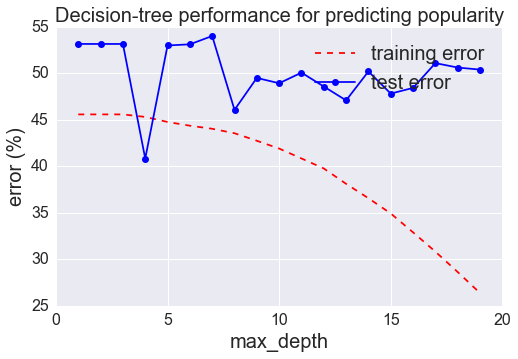

In [119]:
# plot error vs. max_depth
plt.figure(figsize=(8,5))
plt.plot(depth_list, [x * 100 for x in err_train_list], 'r--', label="training error")
plt.plot(depth_list, [x * 100 for x in err_test_list], 'bo-', label="test error")
plt.xlabel("max_depth", fontsize=20)
plt.ylabel("error (%)", fontsize=20)
plt.title("Decision-tree performance for predicting popularity", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='upper right', fontsize=20)

## boosting classifier
## boosting classifier
## boosting classifier


Done model learning
The test error is 0.49141324813145437
The training error is 0.3133879447365203
Done computing error.
Done computing test errors vs. iterations
Done computing training errors vs. iterations


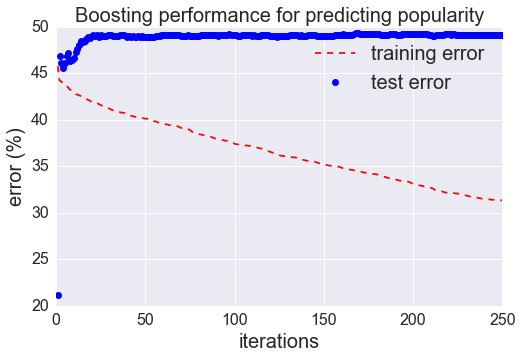

In [98]:
##################################
###### boosting classifier #######
##################################
from sklearn import ensemble

clf = ensemble.GradientBoostingClassifier(max_depth=6, n_estimators=250)
clf.fit(x_train, y_train)
print ("Done model learning")

y_prediction = clf.predict(x_test)
err_test = get_error(y_test, y_prediction)
print ("The test error is {0}".format(err_test))
err_boosting = err_test * 100

y_prediction = clf.predict(x_train)
err_train = get_error(y_train, y_prediction)
print ("The training error is {0}".format(err_train))
print ("Done computing error.")

# compute training and test error vs. iterations
itr = []
err_train_list = []
err_test_list = []
for i, y_pred in enumerate(clf.staged_predict(x_test)):
    itr.append(i + 1)
    err_test = get_error(y_test, y_pred)
    err_test_list.append(err_test)
print ("Done computing test errors vs. iterations")

for i, y_pred in enumerate(clf.staged_predict(x_train)):
    #itr.append(i + 1)
    err_train = get_error(y_train, y_pred)
    err_train_list.append(err_train)
print ("Done computing training errors vs. iterations")

# plot error vs. iterations
plt.figure(figsize=(8,5))
plt.plot(itr, [x * 100 for x in err_train_list], 'r--', label="training error")
plt.plot(itr, [x * 100 for x in err_test_list], 'bo', label="test error")
plt.xlabel("iterations", fontsize=20)
plt.ylabel("error (%)", fontsize=20)
plt.title("Boosting performance for predicting popularity", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='upper right', fontsize=20)